# Workshop 2: Clustering Analysis

#### Descripition
This workshop aims to present how to apply and explore the following clustering algorithms:
1. K-means
2. Hierarchical Clustering
3. DBSCAN

**Course**: INF8111 - Fouille de données (Prof. Daniel Aloise, Summer 2019)

**Author**: Rodrigo Randel & Quentin Fournier

## Imports

In [1]:
# http://www.numpy.org/
import numpy as np

# https://pandas.pydata.org
import pandas as pd

# https://matplotlib.org/
import matplotlib.pyplot as plt

# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

# https://scikit-learn.org/stable/modules/clustering.html
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## Generating our 2D data

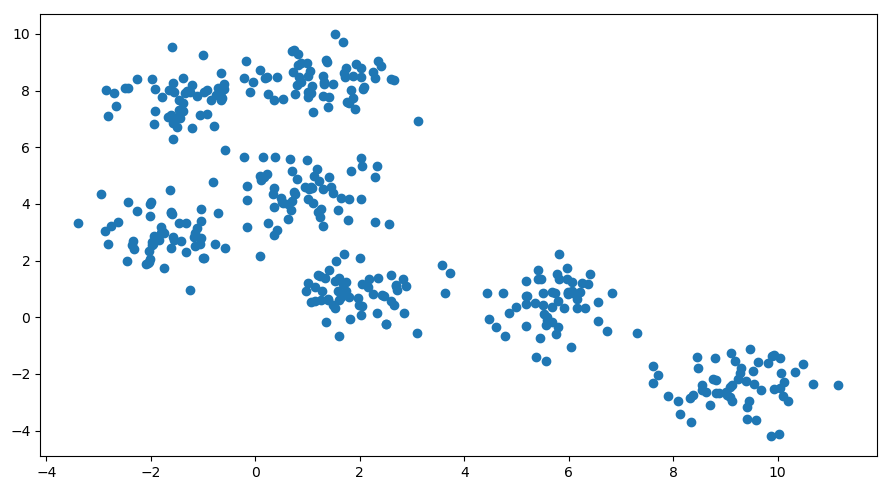

In [26]:
# generate normal blobs
X_data, Y_data = make_blobs(n_samples=400, 
                  n_features=2, 
                  centers=7, 
                  cluster_std=0.7, 
                  shuffle=True, 
                  random_state=0)

# plot data
plt.figure(dpi=100, figsize=(9,5))
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.tight_layout()
plt.show()

### 1. Apply K-means algorithm

In [27]:
# k-means
km = KMeans(n_clusters=7, # number of centroids
            init='k-means++', # centers at random points
            n_init=100, # number of different centroid initializations
            max_iter=300) # number of interations
#             random_state=1) # centroid seed

# train and predict the cluster of each example
Y_km = km.fit_predict(X_data)

# Sum of squared distances of samples to their closest cluster center.
print('SE: %.2f' % km.inertia_)

SE: 380.15


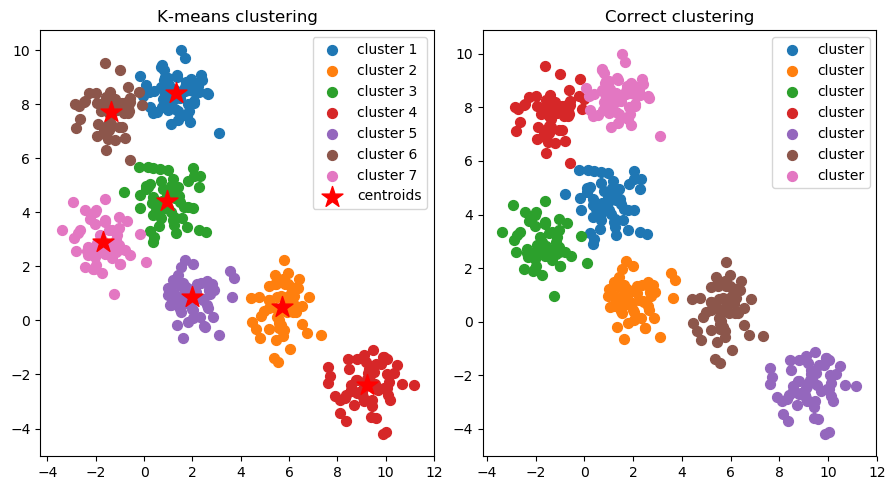

In [28]:
# create 2 subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), dpi=100)

# plot the the prediction and the correct cluster
for i in range(7):
    ax1.scatter(X_data[Y_km==i, 0], X_data[Y_km==i, 1],
                s=50, label='cluster {}'.format(i+1))
    ax2.scatter(X_data[Y_data==i, 0], X_data[Y_data==i, 1],
                s=50, label='cluster'.format(i+1))

# plot centroids
ax1.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='r', label='centroids')

# add titles
ax1.set_title('K-means clustering')
ax2.set_title('Correct clustering')

# add legends
ax1.legend()
ax2.legend()

# show figure
plt.tight_layout()
plt.show()

<br>

### Using the elbow method to find the optimal number of clusters 

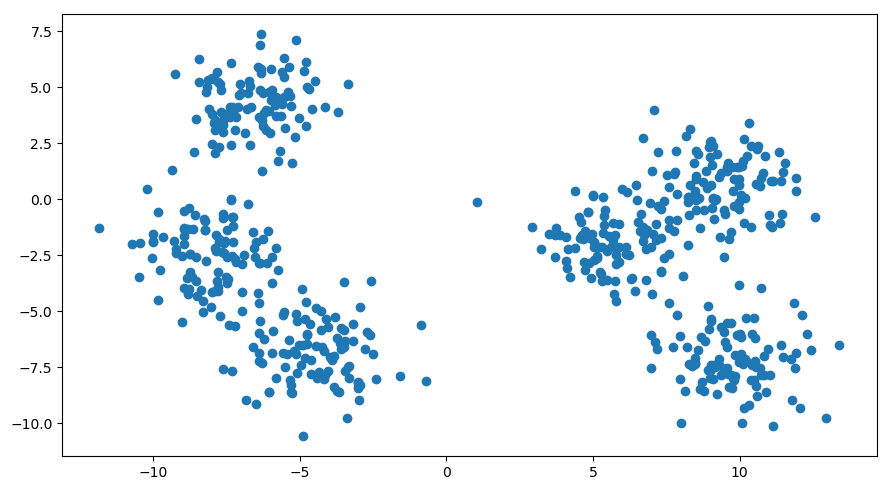

In [65]:
# generate new normal blobs 
X_data, Y_data = make_blobs(n_samples=600, 
                  n_features=2, 
                  centers=6, 
                  cluster_std=1.3, 
                  shuffle=True, 
                  random_state=14546)

# plot data
plt.figure(dpi=100, figsize=(9,5))
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.tight_layout()
plt.show()

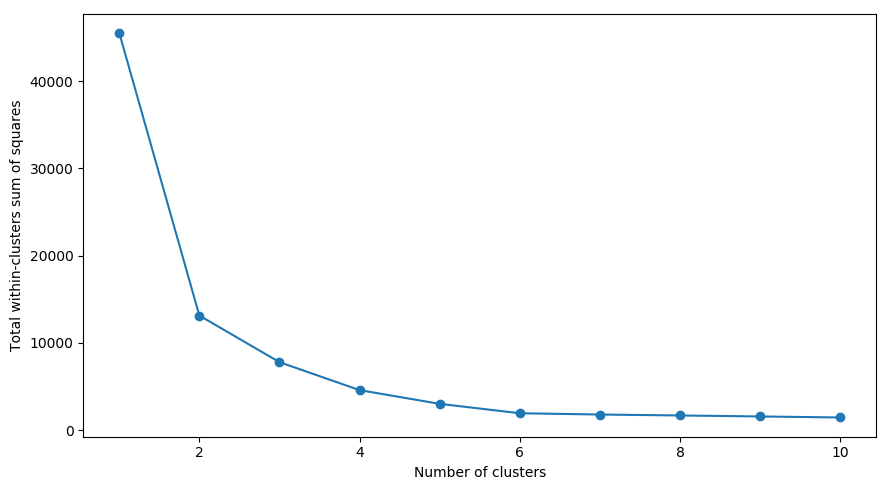

In [66]:
# evaluate the within-class dispersion, i.e. the sum of squared distances of
# samples to their closest cluster center, in function of the nb of centroid
dispersion = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_data)
    dispersion.append(km.inertia_)

plt.figure(dpi=100, figsize=(9,5))
plt.plot(range(1, 11), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Total within-clusters sum of squares')
plt.tight_layout()
plt.show()

Dispersion: 1920.54


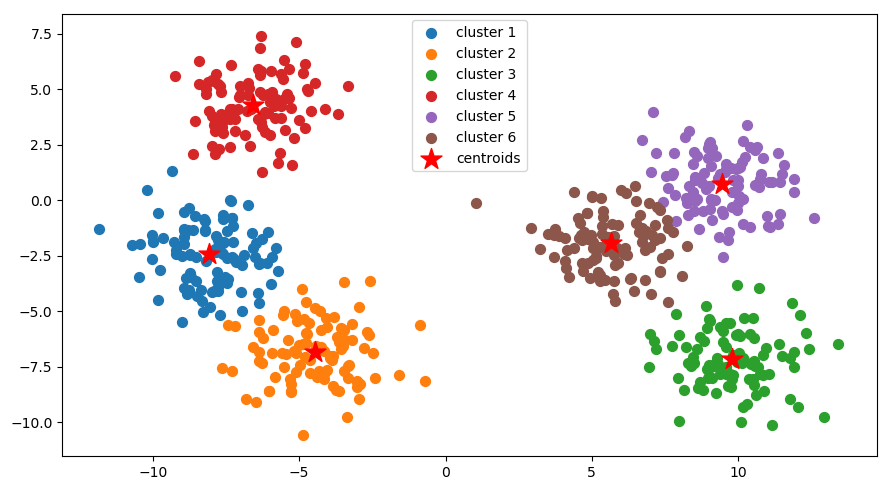

In [67]:
# train k-means with 6 clusters
km = KMeans(n_clusters=6, 
            init='random', #centers at random points
            n_init=10, # number of different centroid initialization  
            max_iter=300, # number of interations
            random_state=0) # centroid seed
Y_km = km.fit_predict(X_data)
print('Dispersion: {:.2f}'.format(km.inertia_)) #Sum of squared distances of samples to their closest cluster center.

# plot clusters
plt.figure(dpi=100, figsize=(9,5))
for i in range(6):
  plt.scatter(X_data[Y_km == i, 0],X_data[Y_km == i, 1], s=50, label='cluster {}'.format(i+1))
  
# plot centroids, legend and show figure
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.tight_layout()
plt.show()

<br>
<br>

### 2.Organizing clusters as a hierarchical tree

In [31]:
# set the seed for reproducibility
np.random.seed(123)

# create 15 normaly distributed 3D examples
variables = ['x', 'y','z']
X_data = np.random.random_sample([15, 3])*10
print(X_data)

[[6.96469186 2.86139335 2.26851454]
 [5.51314769 7.1946897  4.2310646 ]
 [9.80764198 6.84829739 4.80931901]
 [3.92117518 3.43178016 7.29049707]
 [4.38572245 0.59677897 3.98044255]
 [7.37995406 1.8249173  1.75451756]
 [5.31551374 5.31827587 6.34400959]
 [8.49431794 7.24455325 6.11023511]
 [7.22443383 3.22958914 3.61788656]
 [2.28263231 2.93714046 6.30976124]
 [0.9210494  4.33701173 4.30862763]
 [4.93685098 4.2583029  3.12261223]
 [4.26351307 8.93389163 9.44160018]
 [5.01836676 6.23952952 1.15618395]
 [3.17285482 4.14826212 8.66309158]]


### 2.1 Performing hierarchical clustering on a distance matrix

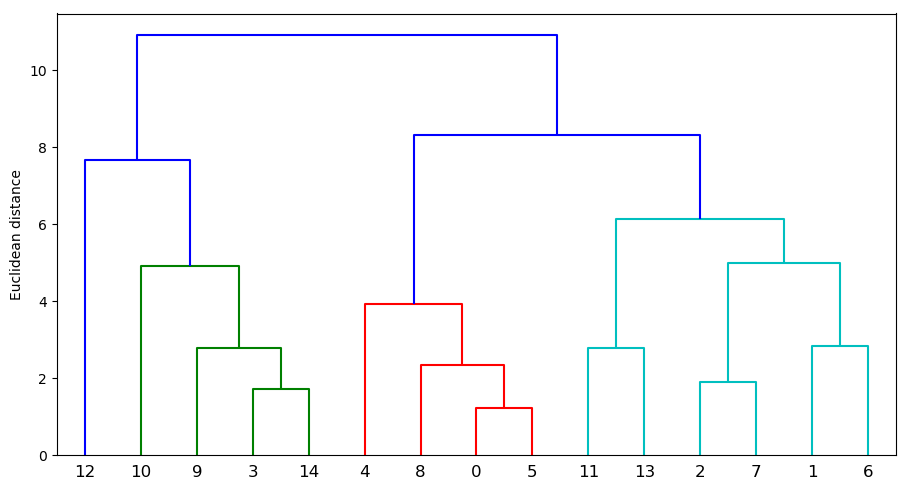

In [34]:
# complete linkag
row_clusters = linkage(X_data, # a collection of m observation vectors in n dimensions 
                       method='complete', 
                       metric='euclidean')
# dendogram plot
plt.figure(figsize=(9,5), dpi=100)
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

<br>

## Density-based clustering via DBSCAN

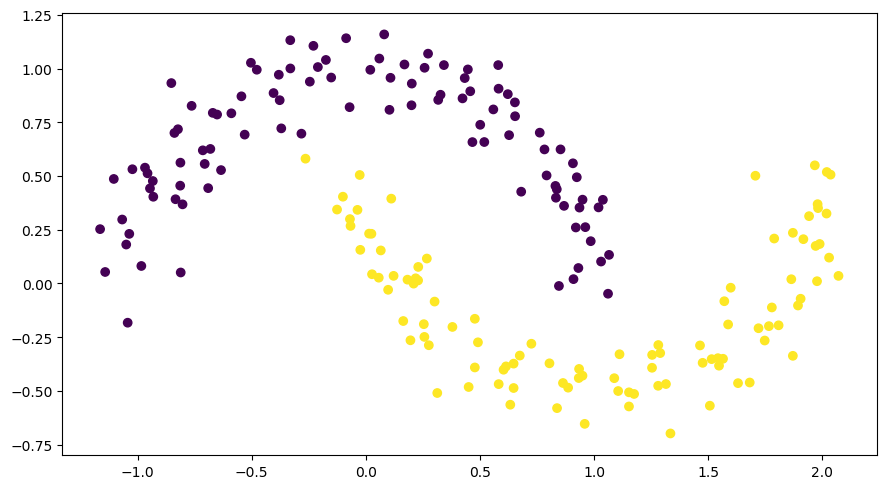

In [37]:
# create moons
X_data, Y_data = make_moons(n_samples=200, noise=0.1, random_state=0)

# plot data
plt.figure(dpi=100, figsize=(9, 5))
plt.scatter(X_data[:, 0], X_data[:, 1], c=Y_data)
plt.tight_layout()
plt.show()

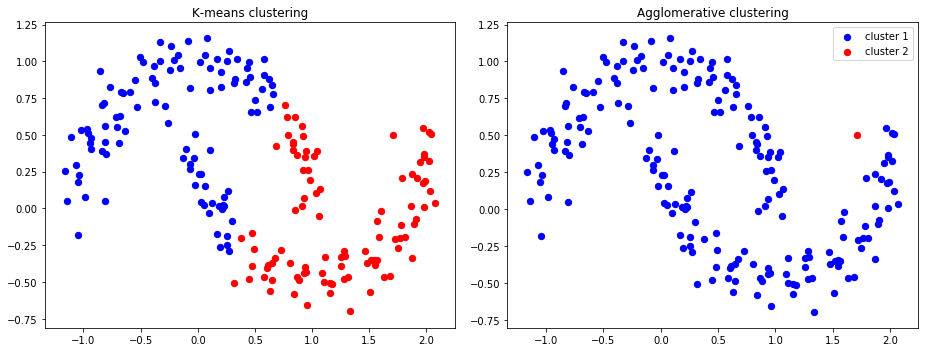

In [38]:
# First, let us apply K-means and hierarchical clustering:

# k-means
km = KMeans(n_clusters=2, random_state=0) 
y_km = km.fit_predict(X_data)

# complete-linkage
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
y_ac = ac.fit_predict(X_data)

# plot K-means
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.scatter(X_data[y_km == 0, 0], X_data[y_km == 0, 1], c='b', s=40, label='cluster 1')
ax1.scatter(X_data[y_km == 1, 0], X_data[y_km == 1, 1], c='r', s=40, label='cluster 2') 
ax1.set_title('K-means clustering')

# plot agglomerative clustering
ax2.scatter(X_data[y_ac == 0, 0], X_data[y_ac == 0, 1], c='b',s=40, label='cluster 1')
ax2.scatter(X_data[y_ac == 1, 0], X_data[y_ac == 1, 1], c='r', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

# show figure
plt.legend()
plt.tight_layout()
plt.show()

#### Apply DBSCAN.

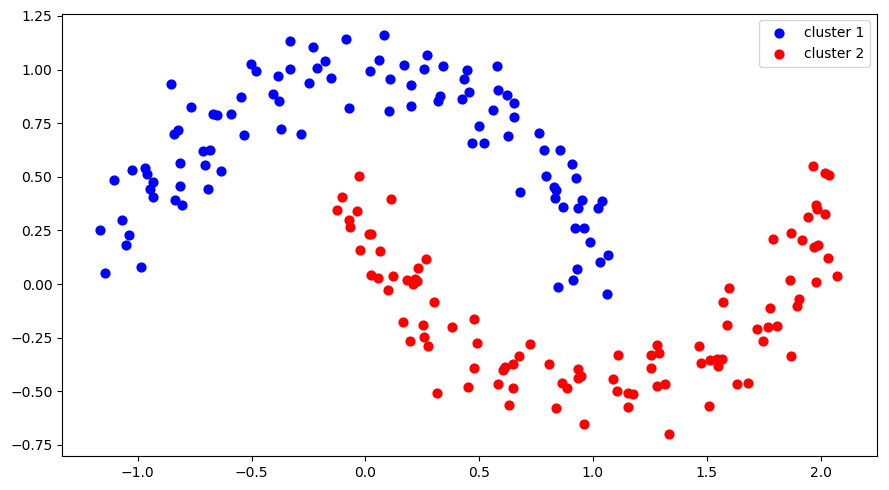

In [47]:
# Density-Based Spatial Clustering of Applications with Noise
db = DBSCAN(eps=0.22,
            min_samples=7,
            metric='euclidean')
y_db = db.fit_predict(X_data)

# plot
plt.figure(figsize=(9,5), dpi=100)
plt.scatter(X_data[y_db == 0, 0], X_data[y_db == 0, 1], c='b', s=40, label='cluster 1')
plt.scatter(X_data[y_db == 1, 0], X_data[y_db == 1, 1], c='r', s=40, label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()